In [ ]:
!pip install numpy==1.24.4

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from scipy import stats



# Laboratorio 1.0:

## Series de tiempo

El siguiente [dataset](https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv) contiene información del precio del eur/usd  desde el 05/07/2022/ hasta el 12/05/2023 con periodicidad de una hora. El data frame contiene el precio de apertura, cierrre, valor más bajo cotizado, valor más alto cotizado, volumen, spread etc. Para este dataset, realizar lo siguiente:


1. Leer el dataset desde el github.
2. Definir como indice la columna time.
3. Obtenga información del data frame (Realizar una grafica de los datos).

4. Determine si hay null, nan en el data frame.

5. Emplea la notacion Pascal Case y trabaja solo con la columa del precio de cierre del eur/usd.  

6. Ahora vamos a determinar cual es la mejor distribución estadística que se ajusta a la diferencia del precio de cierre cada hora, para ello realizamos lo siguiente:
- Determine la diferencia de precio entre horas, agregue una nueva columna llamada DiffPrice, en este punto tu dataframe debe tener solo dos columnas Close, DiffPrice y el indice debe ser el tiempo.
- Para la nueva columna construya un histograma de los datos. También realizar la grafica de DiffPrice vs tiempo
- Determine la mejor distribucion estadística que se ajusta al histograma anterior, para ello puede emplear lo siguente:


https://pypi.org/project/fitter/

```python


from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(data,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
#Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]

```

Con el metodo get_distributions(), podemos ver todas las distribuciones estadisticas de la libreria. Ajusta a la mejor.  Puede consultar [esta](https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9)  página si desea ver un ejemplo.


7. Para el data frame, seleccionemos solo los datos del 2023.

8. El comando groupby permite agrupar los datos con la periodicidad deseada: 1 dias, 2 dias, 1 mes etc. Determina el promedio con una periodicidad de 15 dias, con periodidicidad de 1 semana, y una periodicidad de 1 mes

```python
  df.groupby(pd.Grouper(key='time', freq='15D')).mean()
```

9. Para los datos asociados a los meses de 2023, construya un histograma para cada mes.  Para ello puedo emplear el metodo groupby. Notetese que si no  realiza una operación después de aplicar el metodo grouby, podrias iterar sobre dicho objeto, por ejemplo:

```python
q=df.groupby(pd.Grouper(key='time', freq='15D'))

for name, group in q:
  print(name, group)
```

**Solución laboratorio**

In [ ]:
### 1) Lectura de los datos

url = "https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv"

### Se indica que el indice sea aquella variable "time"
Df = pd.read_csv(url, index_col = "time")

### Se convierte a un DateTime
Df.index = pd.to_datetime(Df.index)

### Se elimina la colunma Unnamed: 0 Se limpia el DataFrame
Df2 = Df.copy()
Df2.drop(columns = ["Unnamed: 0"], inplace = True)
Df2.head()

,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
time,,,,,,,,,,,
2022-07-25 13:00:00,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
2022-07-25 14:00:00,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2022-07-25 15:00:00,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
2022-07-25 16:00:00,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
2022-07-25 17:00:00,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365


In [ ]:
### 2) Renombrar las columnas con formato Pascal Case

def separacion(x):
  """
  Esta función toma una palabra "x" escrita en formato
  snake o cobracase y retorna la palabra escrita en formato Pascal
  """
  together = ""
  if "_" not in x and x[0].isupper():
    return x
  elif "_" not in x and x[0].islower():
    return x.capitalize()
  elif "_" in x:
    letras = x.split("_")
    for i in letras:
      if i[0].isupper():
        together = together + i
      else:
        together = together + i.capitalize()
    return together


columns = Df2.columns
new_columns = list(map(separacion, columns))
Df2.columns = new_columns

Df2.head()


,Open,High,Low,Close,TickVolume,Spread,RealVolume,MeanCloseOpen,DiffClose,DiffOpen,DiffMeanCloseOpen
time,,,,,,,,,,,
2022-07-25 13:00:00,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
2022-07-25 14:00:00,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2022-07-25 15:00:00,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
2022-07-25 16:00:00,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
2022-07-25 17:00:00,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365


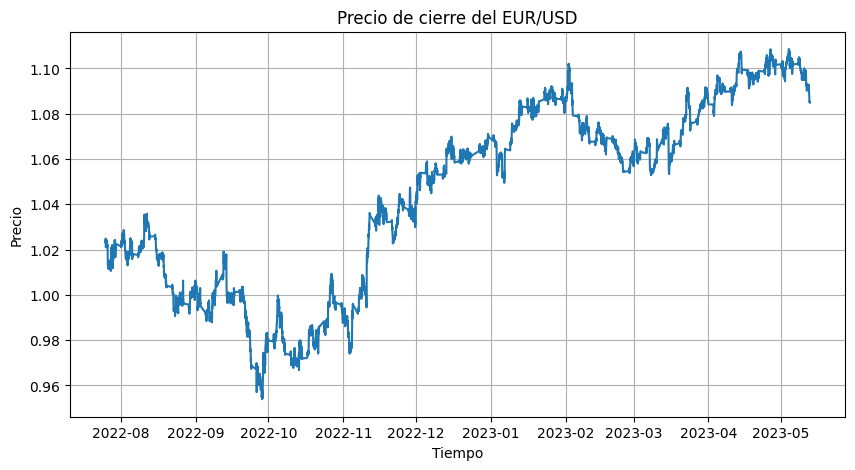

In [ ]:
### 3) Obtenga información del DataFrame, realizar una grafica del mismo.

plt.figure(figsize = (10,5))
plt.plot(Df2["Close"])
plt.title("Precio de cierre del EUR/USD")
plt.xlabel("Tiempo")
plt.ylabel("Precio")
plt.grid(True)

De la anterior grafica podemos observar que existe dos tendencias en la serie de tiempo.

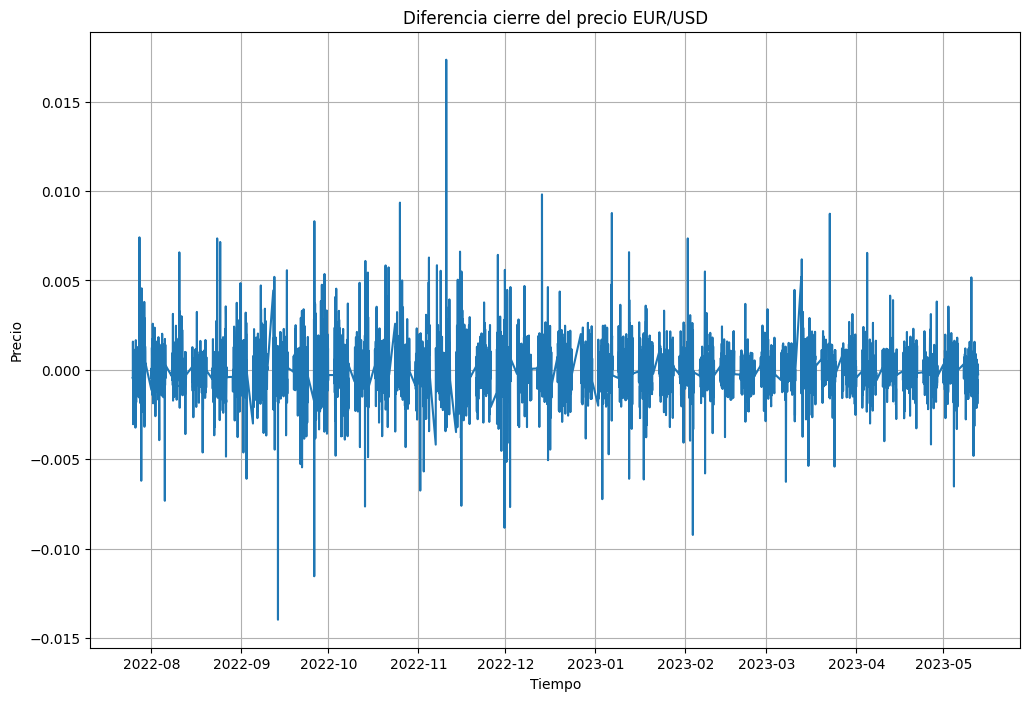

In [ ]:
plt.figure(figsize = (12,8))
plt.plot(Df2["DiffClose"])
plt.title("Diferencia cierre del precio EUR/USD")
plt.xlabel("Tiempo")
plt.ylabel("Precio")
plt.grid(True)

De la anterior grafica no se observa ninguna tendencía y unicamente oscilaciones alrededor de cero. Esto es una distribución aleatoria.

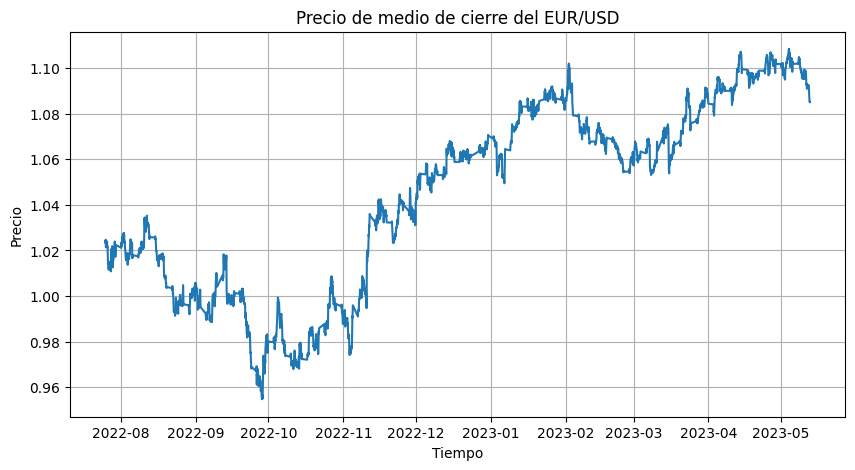

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(Df2["MeanCloseOpen"])
plt.title("Precio de medio de cierre del EUR/USD")
plt.xlabel("Tiempo")
plt.ylabel("Precio")
plt.grid(True)

In [ ]:
### 4) Determinar si hay Null o Nan en el DataFrame
Nan = Df2[Df2.isnull()] ### Esto permite ver la posición del dato NaN

### Eliminando datos NaN
Df2.dropna(inplace = True)

In [ ]:
### 5) Quedarnos solo con la columna DiffClose y Close

interest = ["Close","DiffClose"]
Df3 = Df2.loc[:,interest]
Df3

,Close,DiffClose
time,,
2022-07-25 13:00:00,1.02345,-0.00046
2022-07-25 14:00:00,1.02299,-0.00046
2022-07-25 15:00:00,1.02457,0.00158
2022-07-25 16:00:00,1.02485,0.00028
2022-07-25 17:00:00,1.02181,-0.00304
...,...,...
2023-05-12 19:00:00,1.08514,-0.00038
2023-05-12 20:00:00,1.08546,0.00032
2023-05-12 21:00:00,1.08531,-0.00015


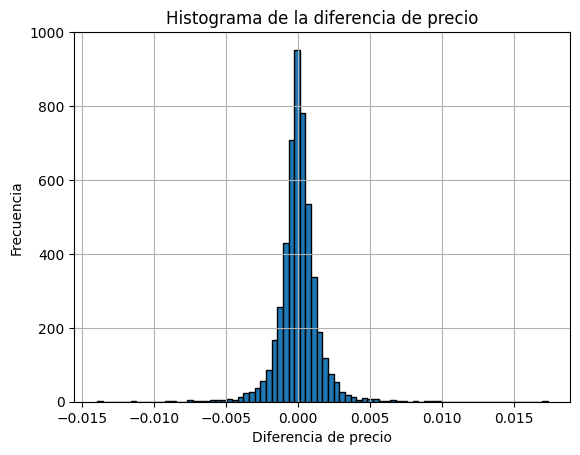

In [ ]:
plt.hist(Df3["DiffClose"], bins = 80, edgecolor = "black")
plt.title("Histograma de la diferencia de precio")
plt.xlabel("Diferencia de precio")
plt.ylabel("Frecuencia")
plt.grid(True)

In [ ]:
!pip install fitter

In [ ]:
from fitter import Fitter, get_common_distributions, get_distributions

In [ ]:
### Todas las posibles distribuciones
distributions = get_distributions()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,106584.812707,3075.010476,3094.562056,inf,0.091642,5.425231e-37
beta,106754.971863,3161.968359,3188.037132,inf,0.090806,2.509625e-36
norm,106822.330973,3181.756227,3194.790614,inf,0.090581,3.782515e-36
burr,721975.771883,-597.804900,-571.736127,inf,0.386419,0.000000e+00
gamma,927131.217799,-376.986282,-357.434702,inf,0.577233,0.000000e+00


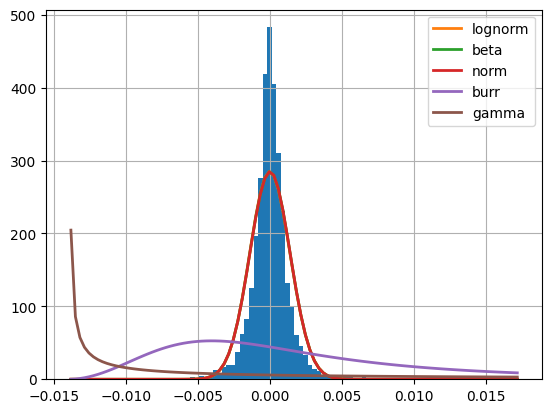

In [ ]:
f = Fitter(Df3["DiffClose"],
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
### Grafica y un pequeño resumen
f.summary()

#### En esta primera aproximación estamos empleando distribuciones
#### continuas comunes, luego ensayamos con todas las distribuciones posibles


In [ ]:
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
#Indentificamos parametros de la distrubicion beta
#f.fitted_param["beta"]

{'lognorm': {'s': 0.009518726459337087,
  'loc': -0.14702365666537284,
  'scale': 0.1470292253332794}}

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
johnsonsu,1672.213285,10.056937,36.125710,inf,0.011040,0.572048
genhyperbolic,1834.421082,21.299461,53.885427,inf,0.011742,0.492105
norminvgauss,1949.465668,89.074357,115.143130,inf,0.009894,0.708005
jf_skew_t,2108.737544,-54.316820,-28.248047,inf,0.012701,0.392131
t,2659.165584,-135.705209,-116.153630,inf,0.012515,0.410505


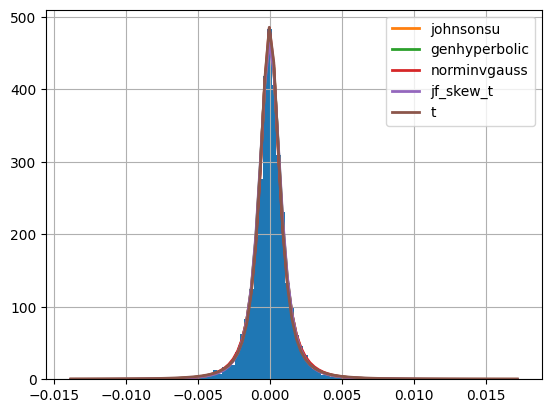

In [ ]:
f2 = Fitter(Df3["DiffClose"],
           distributions = distributions)
f2.fit()
f2.summary()


In [ ]:
#Indentificamos la mejor distribucion con el error cuadratico medio
f2.get_best(method = 'sumsquare_error')

{'johnsonsu': {'a': -0.02094202212206005,
  'b': 1.049836731119901,
  'loc': -1.561334570051359e-05,
  'scale': 0.0008807761475225012}}

De lo anterior concluimos que la distribución que se mejor se ajusta a los datos es $S_{U}$ de Jhonson con la siguiente formula:
\begin{equation}
z = \gamma + \delta sinh^{-1}\left(\frac{x-ℰ}{\lambda}\right)
\end{equation}
Siendo una transformación de una distribución normal.

In [ ]:
#### 7) Selección de los datos del 2023
Df_2023 = Df2.loc["2023"]
#### 8) Agrupar los datos y obtener la media para semana, mes, y 15 días

# ======= 1 semana =======

Week = Df_2023.groupby(pd.Grouper( freq='1W')).mean()

# ======= 15 días ========

D15 = Df_2023.groupby(pd.Grouper( freq='15D')).mean()

# ======= 1 mes =========

Month = Df_2023.groupby(pd.Grouper( freq='30D')).mean()


9. Para los datos asociados a los meses de 2023, construya un histograma para cada mes.  Para ello puedo emplear el metodo groupby. Notetese que si no  realiza una operación después de aplicar el metodo grouby, podrias iterar sobre dicho objeto, por ejemplo:

```python
q=df.groupby(pd.Grouper(key='time', freq='15D'))

for name, group in q:
  print(name, group)
```

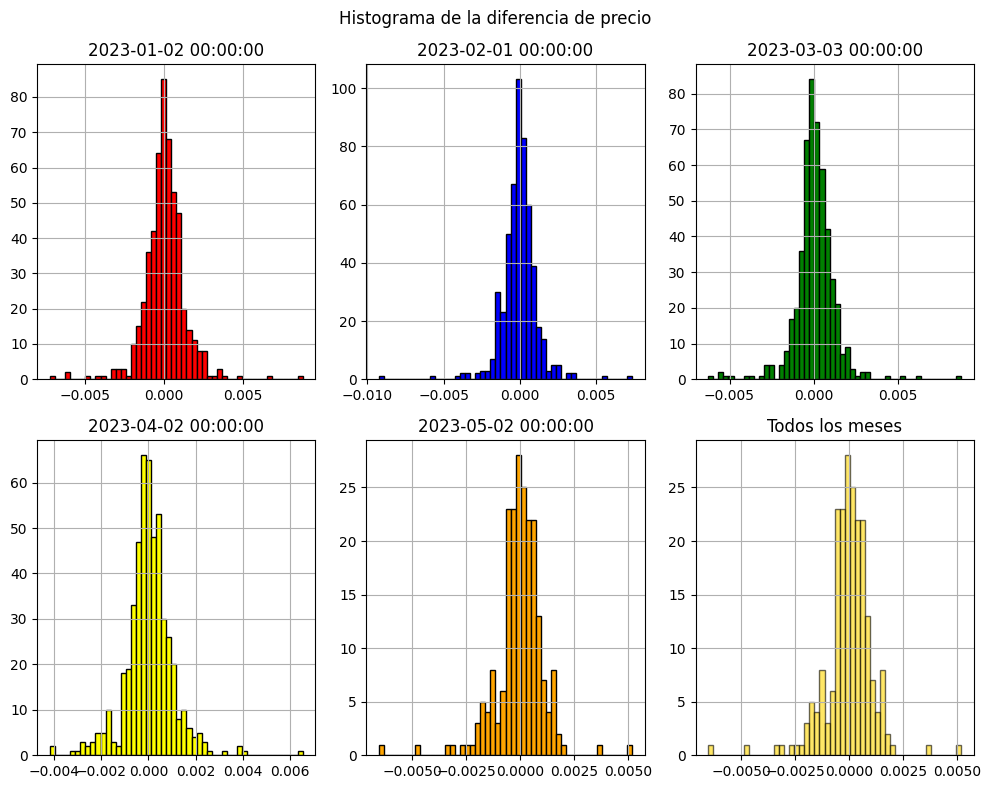

In [ ]:
#### 9) Histograma para cada mes del año 2023.
#### Se va a realizar el histograma para la variable DiffClose
colors = ["red","blue","green","yellow","orange","gold"]
q = Df_2023.groupby(pd.Grouper( freq='30D'))["DiffClose"]
n,m = 0,0
k = 0
fig, ax = plt.subplots(2,3, figsize = (10,8))
for i,j in q:
  values = np.concatenate([j.values])
  ax[n,m].hist(j.values, bins = 50, edgecolor = "black", color = colors[k])
  ax[n,m].set_title(i)
  ax[n,m].grid(True)
  m += 1
  k += 1
  if m == 3 and n != 2:
    m = 0
    n +=1

ax[1,2].hist(values, bins = 50, edgecolor = "black", color = colors[k], alpha =0.6)
ax[1,2].set_title("Todos los meses")
ax[1,2].grid(True)
fig.suptitle("Histograma de la diferencia de precio")
plt.tight_layout()





## Análisis de datos con pandas.

Para el siguiente [dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) realizar lo siguiente:


1. Leer los datos desde una página web.

2. Renombrar las columnas en formato PascalCase.

3. Utilizar los métodos `head()`, `tail()`, `describe()` e `info()` para obtener información sobre el `DataFrame`.

4. Contabilizar la cantidad de valores nulos (`null` o `NaN`) en el `DataFrame`.
   Si se encuentran valores nulos, ¿qué estrategia propondrías para reemplazarlos?

5. Identificar los valores únicos en la columna `target` que representan las etiquetas B y M (Benigno y Maligno, respectivamente).
   Utiliza el método `unique()` para mostrar estos valores.

6. Realizar un conteo de los casos etiquetados como B y M utilizando la librería `seaborn` y el método `countplot()`:

```python
import seaborn as sns
sns.countplot?
```

7. Agregar una nueva columna llamada `DiagnosisNumeric` donde se asigna el valor 0 a la etiqueta B (Benigno) y el valor 1 a la etiqueta M (Maligno).


8. Normalizar cada columna respecto a su media y desviación estándar utilizando la fórmula:  
   `(x - mean(x)) / std(x)`

9. Agrupar características similares y calcular su promedio.
   Para las siguientes características:

```python
['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', "SymmetryMean", "FractalDimensionMean"]
```

Usa expresiones regulares para identificar patrones comunes, como `radius1`, `radius2`,`radius3`, etc., y calcular los promedios. Por ejemplo:

```python
re.match(r'^[a-zA-Z_]+', "holamundo12341").group(0)
```

También puedes utilizar el método `startswith()` para buscar estos patrones en los nombres de las columnas.


10. Crear un gráfico donde se muestre el histograma de la columna `RadiusMean` separado por las etiquetas B y M, utilizando colores diferentes (naranja y azul, respectivamente) para cada diagnóstico.

11. Generar gráficos de violín para múltiples características.
   Para las columnas:

   - `RadiusMean`
   - `TextureMean`
   - `PerimeterMean`
   - `AreaMean`
   - `SmoothnessMean`
   - `CompactnessMean`
   - `ConcavityMean`
   - `ConcavePointsMean`
   - `Symmetry3`
   - `FractalDimension3`

   Realiza un gráfico múltiple tipo violín, como en el siguiente ejemplo:

```python
data = pd.melt(df.iloc[:, 0:10], id_vars="Diagnosis", var_name="features", value_name="value")
sns.violinplot(x="features", y="value", hue="Diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=45)
```


12.  Determinar y eliminar los valores atípicos (`outliers`) en la columna `RadiusMean`.

Para identificarlos, construye un gráfico tipo `boxplot`:

```python
df.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(18,6))
```

Usa el rango intercuartílico (IQR) para definir los outliers. Los valores fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] se consideran outliers. Ejemplo de cómo eliminar estos valores:

```python
Q1 = df['edad'].quantile(0.25)
Q3 = df['edad'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['edad'] < (Q1 - 1.5 * IQR)) | (df['edad'] > (Q3 + 1.5 * IQR)))]
```

Otra alternativa es utilizar el puntaje Z para detectar `outliers`:

```python
df = df[(np.abs(stats.zscore(df['edad'])) < 3)]
```



13. Encontrar la matrix de correlación, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.

14. ¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?


In [ ]:
### 1) Lectura de los datos de la web
url2 = "https://archive.ics.uci.edu/static/public/17/data.csv"
df = pd.read_csv(url2)

In [ ]:
### 2) Renombrar las variables en el format pascal Case
names = df.columns
new_names = list(map(separacion, names))
df.columns = new_names

In [ ]:
### 3) Empleo de los metodos head(), tail(), describe() e info()
### para obtener información del data Frame
df.head()

,ID,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,...,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,Diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [ ]:
df.tail()

,ID,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,...,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,Diagnosis
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M
568,92751,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,B


In [ ]:
df.describe()

,ID,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 569 non-null    int64  
 1   Radius1            569 non-null    float64
 2   Texture1           569 non-null    float64
 3   Perimeter1         569 non-null    float64
 4   Area1              569 non-null    float64
 5   Smoothness1        569 non-null    float64
 6   Compactness1       569 non-null    float64
 7   Concavity1         569 non-null    float64
 8   ConcavePoints1     569 non-null    float64
 9   Symmetry1          569 non-null    float64
 10  FractalDimension1  569 non-null    float64
 11  Radius2            569 non-null    float64
 12  Texture2           569 non-null    float64
 13  Perimeter2         569 non-null    float64
 14  Area2              569 non-null    float64
 15  Smoothness2        569 non-null    float64
 16  Compactness2       569 non

In [ ]:
### 4) Contabilizar los datos null, o nan
df.isnull().sum() ### Esto me brinda por cada columna el elemento nulo, y no encontre ninguno nulo

,0
ID,0
Radius1,0
Texture1,0
Perimeter1,0
Area1,0
Smoothness1,0
Compactness1,0
Concavity1,0
ConcavePoints1,0
Symmetry1,0


In [ ]:
### 5) Identificar los valores únicos en la columna `target` que representan las etiquetas B y M (Benigno y Maligno, respectivamente)
### Usar el método `unique()` para mostrar estos valores.
B_M = df["Diagnosis"].unique()
mask_m = df["Diagnosis"] == B_M[0]
mask_b = df["Diagnosis"] == B_M[1]
df[mask_m]

,ID,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,...,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,Diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926125,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,...,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873,M
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115,M
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637,M
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820,M


In [ ]:
df[mask_b]

,ID,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,...,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,Diagnosis
19,8510426,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
20,8510653,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
21,8510824,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
37,854941,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
46,85713702,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,925277,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,0.1454,...,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004,B
559,925291,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,0.1388,...,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732,B
560,925292,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,0.1537,...,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321,B
561,925311,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,0.1060,...,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905,B


Hay 212 casos de tumar maligno y 357 de benigno


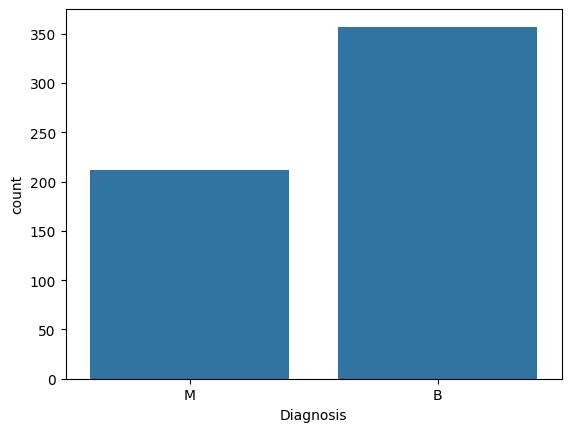

In [ ]:
### 6. Realizar un conteo de los casos etiquetados como B y M utilizando la librería `seaborn` y el método `countplot()`:

import seaborn as sns
sns.countplot(data = df, x = "Diagnosis")
print("Hay 212 casos de tumar maligno y 357 de benigno")

In [ ]:
### 7. Agregar una nueva columna llamada `DiagnosisNumeric` donde se asigna el valor 0 a la etiqueta B (Benigno) y el valor 1 a la etiqueta M (Maligno).
index_m = df[mask_m].index
index_b = df[mask_b].index
DiagnosisNumeric = np.zeros(len(df))
DiagnosisNumeric[index_m] = 1 ### Maligno 1.
df["DiagnosisNumeric"] = DiagnosisNumeric

In [ ]:
### 8. Normalizar cada columna respecto a su media y desviación estándar utilizando la fórmula:
  #  `(x - mean(x)) / std(x)`
new_names_ = df.columns
### Eliminando las variables categoricas
interest = [x for x in new_names_ if x != "Diagnosis" and x != "DiagnosisNumeric" and x != "ID"]
df_interest = df[interest]
df_interest = (df_interest - df_interest.mean())/df_interest.std()
df_interest

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,-0.312314,-0.930209,...,1.899514,0.117596,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963,-0.708467
565,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,-0.217473,-1.057681,...,1.535369,2.045599,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387,-0.973122
566,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,-0.808406,-0.894800,...,0.560868,1.373645,0.578492,0.427529,-0.808876,0.350427,0.326479,0.413705,-1.103578,-0.318129
567,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,2.135315,1.042778,...,1.959515,2.235958,2.301575,1.651717,1.429169,3.901415,3.194794,2.287972,1.917396,2.217684


In [ ]:
### 9) Agrupar características similares y calcular su promedio.Para las siguientes características:
#['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', "SymmetryMean", "FractalDimensionMean"]

Radius = np.concatenate([df_interest["Radius1"],df_interest["Radius2"],df_interest["Radius3"]])
Texture = np.concatenate([df_interest["Texture1"],df_interest["Texture2"],df_interest["Texture3"]])
Perimeter = np.concatenate([df_interest["Perimeter1"],df_interest["Perimeter2"],df_interest["Perimeter3"]])
Area = np.concatenate([df_interest["Area1"],df_interest["Area2"],df_interest["Area3"]])
Smoothness = np.concatenate([df_interest["Smoothness1"],df_interest["Smoothness2"],df_interest["Smoothness3"]])
Compacteness = np.concatenate([df_interest["Compactness1"],df_interest["Compactness2"],df_interest["Compactness3"]])
Concavity = np.concatenate([df_interest["Concavity1"],df_interest["Concavity2"],df_interest["Concavity3"]])
ConcavePoints = np.concatenate([df_interest["ConcavePoints1"],df_interest["ConcavePoints2"],df_interest["ConcavePoints3"]])
Symmetry = np.concatenate([df_interest["Symmetry1"],df_interest["Symmetry2"],df_interest["Symmetry3"]])
FractalDimension = np.concatenate([df_interest["FractalDimension1"],df_interest["FractalDimension2"],df_interest["FractalDimension3"]])
Diagnosis = np.concatenate([df["Diagnosis"],df["Diagnosis"],df["Diagnosis"]])
### Diccionario, media:

dic2 = {"RadiusMean":Radius,"TextureMean":Texture,"PerimeterMean":Perimeter,"AreaMean":Area,"SmoothnessMean":Smoothness,"CompactenessMean":Compacteness,"ConcavityMean":Concavity,
        "ConcavePointsMean":ConcavePoints,"SymetryMean":Symmetry,"FractalDimensionMean":FractalDimension,"Diagnosis":Diagnosis}

df_mean = pd.DataFrame(dic2)

#### DataFrame con todos los elementos de interes agrupados

df_mean



,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactenessMean,ConcavityMean,ConcavePointsMean,SymetryMean,FractalDimensionMean,Diagnosis
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,M
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,M
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,M
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,M
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,M
...,...,...,...,...,...,...,...,...,...,...,...
1702,1.899514,0.117596,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963,-0.708467,M
1703,1.535369,2.045599,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387,-0.973122,M
1704,0.560868,1.373645,0.578492,0.427529,-0.808876,0.350427,0.326479,0.413705,-1.103578,-0.318129,M
1705,1.959515,2.235958,2.301575,1.651717,1.429169,3.901415,3.194794,2.287972,1.917396,2.217684,M


In [ ]:
### 9) Agrupar características similares y calcular su promedio.Para las siguientes características:
#['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', "SymmetryMean", "FractalDimensionMean"]

Radius1 = np.concatenate([df["Radius1"],df["Radius2"],df["Radius3"]])
Texture1 = np.concatenate([df["Texture1"],df["Texture2"],df["Texture3"]])
Perimeter1 = np.concatenate([df["Perimeter1"],df["Perimeter2"],df["Perimeter3"]])
Area1 = np.concatenate([df["Area1"],df["Area2"],df["Area3"]])
Smoothness1 = np.concatenate([df["Smoothness1"],df["Smoothness2"],df["Smoothness3"]])
Compacteness1 = np.concatenate([df["Compactness1"],df["Compactness2"],df["Compactness3"]])
Concavity1 = np.concatenate([df["Concavity1"],df["Concavity2"],df["Concavity3"]])
ConcavePoints1 = np.concatenate([df["ConcavePoints1"],df["ConcavePoints2"],df["ConcavePoints3"]])
Symmetry1 = np.concatenate([df["Symmetry1"],df["Symmetry2"],df["Symmetry3"]])
FractalDimension1 = np.concatenate([df["FractalDimension1"],df["FractalDimension2"],df["FractalDimension3"]])
Diagnosis1 = np.concatenate([df["Diagnosis"],df["Diagnosis"],df["Diagnosis"]])
### Diccionario, media:

dic3 = {"RadiusMean":Radius1,"TextureMean":Texture1,"PerimeterMean":Perimeter1,"AreaMean":Area1,"SmoothnessMean":Smoothness1,"CompactenessMean":Compacteness1,"ConcavityMean":Concavity1,
        "ConcavePointsMean":ConcavePoints1,"SymetryMean":Symmetry1,"FractalDimensionMean":FractalDimension1,"Diagnosis":Diagnosis1}

df_mean3 = pd.DataFrame(dic3)

#### DataFrame con todos los elementos de interes agrupados

df_mean3

,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactenessMean,ConcavityMean,ConcavePointsMean,SymetryMean,FractalDimensionMean,Diagnosis
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,M
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,M
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,M
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,M
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,M
...,...,...,...,...,...,...,...,...,...,...,...
1702,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115,M
1703,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637,M
1704,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820,M
1705,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400,M


In [ ]:
df_mean.iloc[:, 0:10].mean().round(20) ### Resumen de la media para cada dato normalizado.

,0
RadiusMean,-2.414300e-16
TextureMean,-7.280000e-18
PerimeterMean,-1.998000e-16
AreaMean,-1.040600e-16
SmoothnessMean,-4.037600e-16
CompactenessMean,1.873000e-17
ConcavityMean,1.061400e-16
ConcavePointsMean,5.828000e-17
SymetryMean,1.769100e-16
FractalDimensionMean,-1.873000e-17


In [ ]:
df_mean3.iloc[:,0:10].mean(),round(4)   #### Resumen de la media para cada dato sin normalizar

(RadiusMean               10.267218
 TextureMean              15.394575
 PerimeterMean            67.365435
 AreaMean                525.269770
 SmoothnessMean            0.078590
 CompactenessMean          0.128028
 ConcavityMean             0.130961
 ConcavePointsMean         0.058441
 SymetryMean               0.163927
 FractalDimensionMean      0.050179
 dtype: float64,
 4)


10. Crear un gráfico donde se muestre el histograma de la columna `RadiusMean` separado por las etiquetas B y M, utilizando colores diferentes (naranja y azul, respectivamente) para cada diagnóstico.

Text(0.5, 1.0, 'Histograma de la variable RadiusMean')

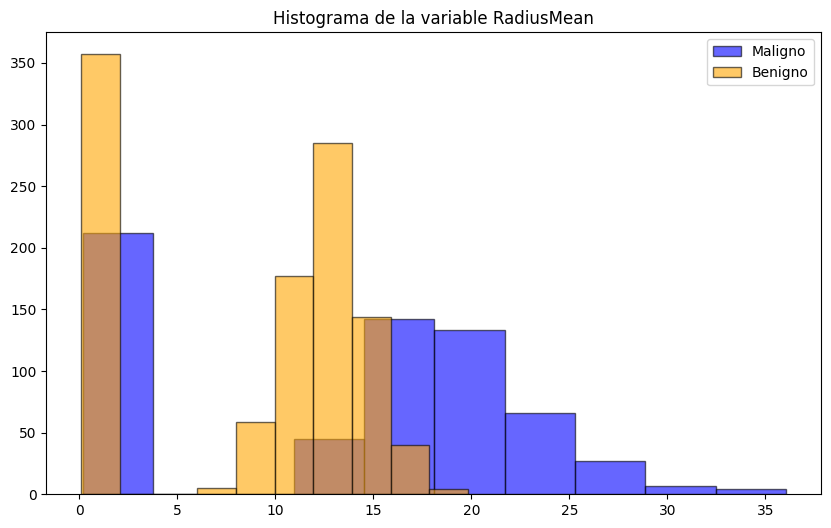

In [ ]:
## 10) Agrupar los datos de RaidusMean en M y B

### Primero obtenemos los indices en el dataFrame para cada caracteristica indicada.
index_m = df[mask_m].index
index_b = df[mask_b].index

### Posteriormente de cada variable tomamos dichos indices, esto es:

df_m1 = df["Radius1"].loc[index_m]
df_m2 = df["Radius2"].loc[index_m]
df_m3 = df["Radius3"].loc[index_m]
radius_m_ = np.concatenate([df_m1,df_m2,df_m3])

df_b1 = df["Radius1"].loc[index_b]
df_b2 = df["Radius2"].loc[index_b]
df_b3 = df["Radius3"].loc[index_b]
radius_b = np.concatenate([df_b1,df_b2,df_b3])

plt.figure(figsize = (10,6))
plt.hist(radius_m_, bins = 10, edgecolor = "black", color = "blue", alpha = 0.6, label = "Maligno")
plt.hist(radius_b, bins = 10, edgecolor = "black", color = "orange", alpha = 0.6, label = "Benigno")
plt.legend()
plt.title("Histograma de la variable RadiusMean")

La forma del histograma depende fuertemente de la cantidad de clases que decidamos tomar para agrupar los elementos de cada clase del tumor, pero en general vemos que hay una gran tendencía para valores cercanos a cero, lo que implica que cuando tomamos pequeñas clases (anchos de intervalos del eje x mayores) va a haber una mayor concentración entre estos datos, y cuanta más clases haya menor será la altura del histograma.

11. Generar gráficos de violín para múltiples características.
   Para las columnas:

   - `RadiusMean`
   - `TextureMean`
   - `PerimeterMean`
   - `AreaMean`
   - `SmoothnessMean`
   - `CompactnessMean`
   - `ConcavityMean`
   - `ConcavePointsMean`
   - `Symmetry3`
   - `FractalDimension3`

   Realiza un gráfico múltiple tipo violín, como en el siguiente ejemplo:

```python
data = pd.melt(df.iloc[:, 0:10], id_vars="Diagnosis", var_name="features", value_name="value")
sns.violinplot(x="features", y="value", hue="Diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=45)
```


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'RadiusMean'),
  Text(1, 0, 'TextureMean'),
  Text(2, 0, 'PerimeterMean'),
  Text(3, 0, 'AreaMean'),
  Text(4, 0, 'SmoothnessMean'),
  Text(5, 0, 'CompactenessMean'),
  Text(6, 0, 'ConcavityMean'),
  Text(7, 0, 'ConcavePointsMean'),
  Text(8, 0, 'SymetryMean'),
  Text(9, 0, 'FractalDimensionMean')])

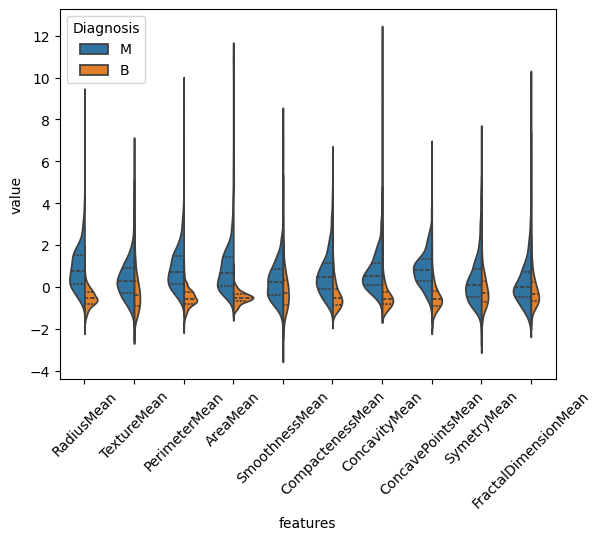

In [ ]:
data = pd.melt(df_mean.iloc[:, 0:11], id_vars="Diagnosis", var_name="features", value_name="value")
sns.violinplot(x="features", y="value", hue="Diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=45)


12.  Determinar y eliminar los valores atípicos (`outliers`) en la columna `RadiusMean`.

Para identificarlos, construye un gráfico tipo `boxplot`:

```python
df.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(18,6))
```

Usa el rango intercuartílico (IQR) para definir los outliers. Los valores fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] se consideran outliers. Ejemplo de cómo eliminar estos valores:

```python
Q1 = df['edad'].quantile(0.25)
Q3 = df['edad'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['edad'] < (Q1 - 1.5 * IQR)) | (df['edad'] > (Q3 + 1.5 * IQR)))]
```

Otra alternativa es utilizar el puntaje Z para detectar `outliers`:

```python
df = df[(np.abs(stats.zscore(df['edad'])) < 3)]
```


<Axes: title={'center': 'RadiusMean'}, xlabel='Diagnosis'>

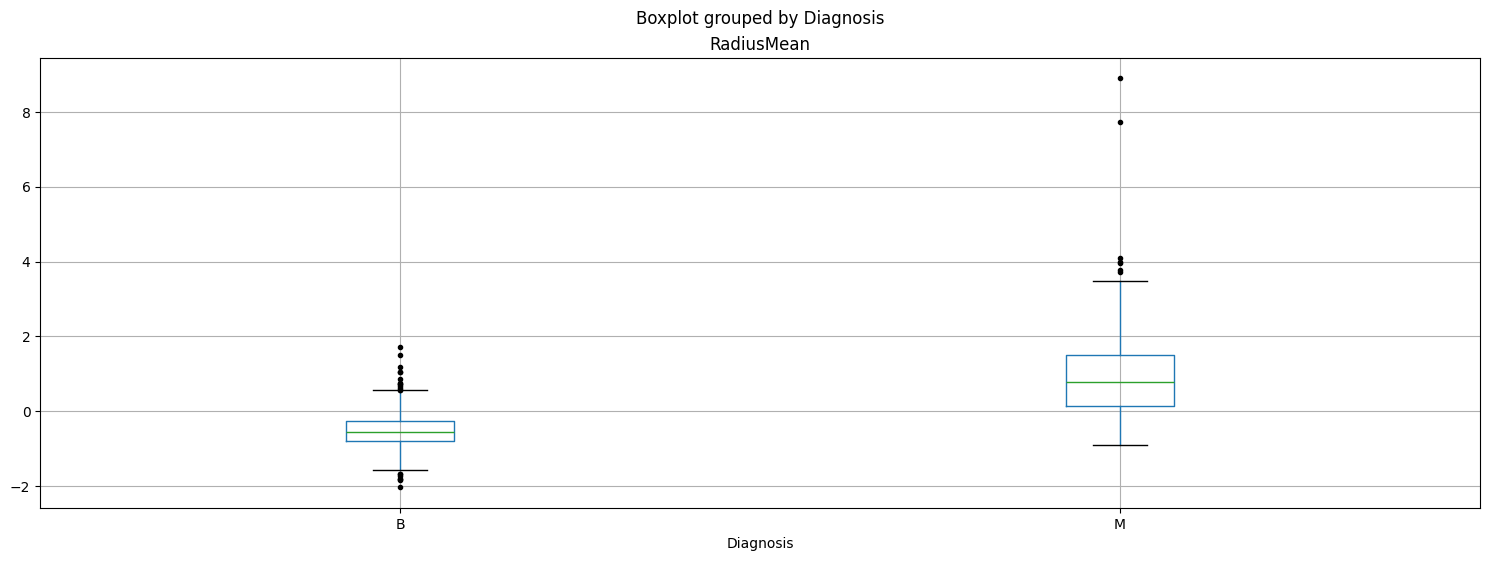

In [ ]:
df_mean.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(18,6))
### Aquellos puntos que están fuera de la media son aquellos que se encuentra por fuera
### del diagrama de caja.


In [ ]:
### Vamos a determinar aquellos datos atipicos.
Q1 = df_mean["RadiusMean"].quantile(0.25)
Q3 = df_mean["RadiusMean"].quantile(0.75)
IQR = Q3 - Q1
valores_outliers = df_mean[(df_mean["RadiusMean"] < (Q1 - 1.5 * IQR)) | (df_mean["RadiusMean"] > (Q3 + 1.5 * IQR))]
pos_outliers = valores_outliers.index

### eliminando los valores outliers

df_mean_ = df_mean.drop(pos_outliers)

In [ ]:
Q1 = df_mean['RadiusMean'].quantile(0.25)
Q3 = df_mean['RadiusMean'].quantile(0.75)
IQR = Q3 - Q1
df5 = df_mean[~((df_mean['RadiusMean'] < (Q1 - 1.5 * IQR)) | (df_mean['RadiusMean'] > (Q3 + 1.5 * IQR)))]
df5

,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactenessMean,ConcavityMean,ConcavePointsMean,SymetryMean,FractalDimensionMean,Diagnosis
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,M
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,M
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,M
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,M
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,M
...,...,...,...,...,...,...,...,...,...,...,...
1702,1.899514,0.117596,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963,-0.708467,M
1703,1.535369,2.045599,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387,-0.973122,M
1704,0.560868,1.373645,0.578492,0.427529,-0.808876,0.350427,0.326479,0.413705,-1.103578,-0.318129,M
1705,1.959515,2.235958,2.301575,1.651717,1.429169,3.901415,3.194794,2.287972,1.917396,2.217684,M



13. Encontrar la matrix de correlación, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.

14. ¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?


Text(0.5, 1.0, 'Matriz de correlación')

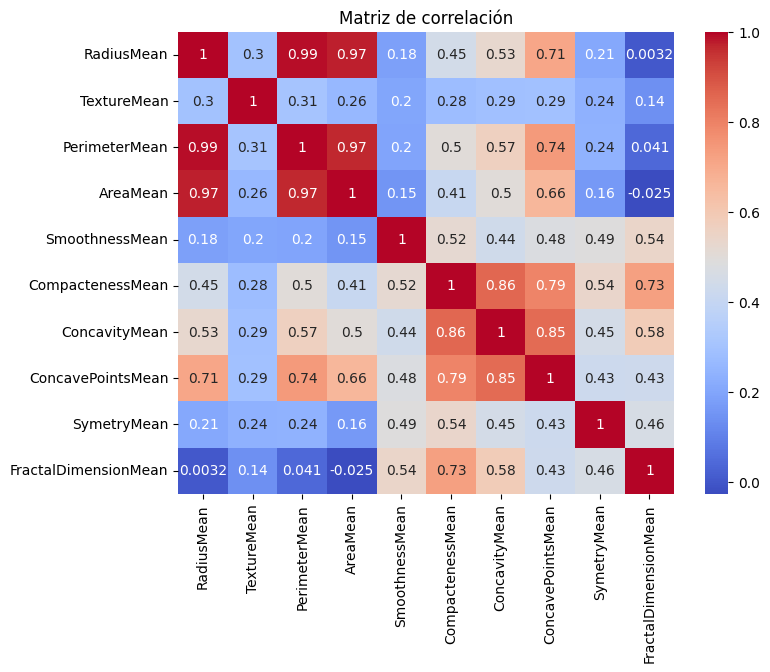

In [ ]:
### 13 ) Matriz de correlación para los datos medios.
matrix_corr = df_mean.iloc[:, 0:10].corr()
matrix_corr

### 13 ) Grafica de la matriz de correlación

plt.figure(figsize = (8,6))
sns.heatmap(matrix_corr, annot = True, cmap = "coolwarm")
plt.title("Matriz de correlación")

Otro tipo de grafica util para visualizar los datos fuera del extenso numero de graficas empleadas a lo largo del documento serían barplot de la librería seasborn. Aquella grafica muestra promedios de una variable dado una categoría.


Text(0, 0.5, 'Radio y Textura')

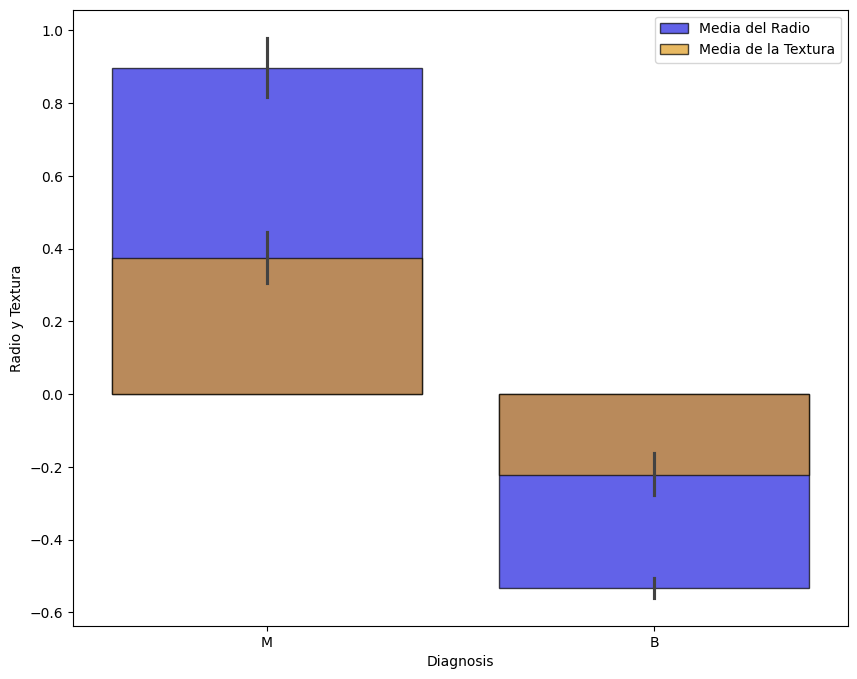

In [ ]:
### 14) Otro tipo de graficas util. Barplot.

plt.figure(figsize = (10,8))
sns.barplot(data = df_mean, x = "Diagnosis", y = "RadiusMean", alpha = 0.7, edgecolor = "black", color = "blue", label = "Media del Radio")
sns.barplot(data = df_mean, x = "Diagnosis", y = "TextureMean", alpha = 0.7, edgecolor = "black", color = "orange", label = "Media de la Textura")
plt.legend()
plt.ylabel("Radio y Textura")